In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np


import plotly.express as px

#### Load the data

In [2]:
gdf = gpd.read_file("data/SanFranciscoSpeedLimitCompliance.csv")
gdf.crs = 'epsg:4326'

In [3]:
gdf.head()

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,None
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None


In [4]:
gdf

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,None
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
...,...,...,...,...,...,...,...,...,...,...
608,409000,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16,1,26.2,32.31,37,None
609,410000,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16,1,26.2,32.31,37,None
610,411000,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16,1,26.2,32.31,37,None
611,415000,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18,0,25.1,32,0,None


### Extract points from linestring in the `the_geo` column

In [5]:
# dictionary, key: idx of row, value: list of points coordinates
idx_points = {}
for idx, row in enumerate(gdf.the_geom):
    # print(list(row.coords))
    points_coords = []
    for point in row[12:-1].split(','):
        coords = point.strip().split(' ')
        coords = [float(x) for x in coords]
        # print(idx, coords)
        points_coords.append(coords)
    idx_points[idx] = points_coords

In [6]:
# show first 5 elements
list(idx_points.items())[:4]

[(0,
  [[-122.39031948388298, 37.78813450234439],
   [-122.39117965804613, 37.787455186972764]]),
 (1,
  [[-122.39117965804613, 37.787455186972764],
   [-122.39205296294394, 37.78676548321337]]),
 (2,
  [[-122.39961623244395, 37.78079148306888],
   [-122.40184327335723, 37.77903213358389]]),
 (3,
  [[-122.38775628064698, 37.75283561191084],
   [-122.38767895622722, 37.75275271855192],
   [-122.38757222629916, 37.751639193810746],
   [-122.38763397457048, 37.7515596035663]])]

In [7]:
import shapely.geometry
import shapely.wkt

In [8]:
lines = []
for idx, row in enumerate(gdf.the_geom[:5]):
    line = shapely.wkt.loads(row)
    lines.append(lines)
    print(row)

LINESTRING (-122.39031948388298 37.78813450234439, -122.39117965804613 37.787455186972764)
LINESTRING (-122.39117965804613 37.787455186972764, -122.39205296294394 37.78676548321337)
LINESTRING (-122.39961623244395 37.78079148306888, -122.40184327335723 37.77903213358389)
LINESTRING (-122.38775628064698 37.75283561191084, -122.38767895622722 37.75275271855192, -122.38757222629916 37.751639193810746, -122.38763397457048 37.7515596035663)
LINESTRING (-122.38775628064698 37.75283561191084, -122.38781677990747 37.752742975819686, -122.38771113084314 37.75164075762112, -122.38763397457048 37.7515596035663)


In [9]:
for line in lines:
    print(line)

[[...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...]]


In [10]:
pol1 = shapely.wkt.loads("POLYGON ((0 0, 0 -1, 7.5 -1, 7.5 0, 0 0))")POLYGON ((0 0, 0 -1, 7.5 -1, 7.5 0, 0 0))"

SyntaxError: invalid syntax (<ipython-input-10-2bb292bb3889>, line 1)

### Use wkt to load LineStrings

In [11]:
import shapely.geometry
import shapely.wkt

In [12]:
lines = []
for idx, row in enumerate(gdf.the_geom[:5]):
    line = shapely.wkt.loads(row)
    lines.append(lines)
    print(row)

LINESTRING (-122.39031948388298 37.78813450234439, -122.39117965804613 37.787455186972764)
LINESTRING (-122.39117965804613 37.787455186972764, -122.39205296294394 37.78676548321337)
LINESTRING (-122.39961623244395 37.78079148306888, -122.40184327335723 37.77903213358389)
LINESTRING (-122.38775628064698 37.75283561191084, -122.38767895622722 37.75275271855192, -122.38757222629916 37.751639193810746, -122.38763397457048 37.7515596035663)
LINESTRING (-122.38775628064698 37.75283561191084, -122.38781677990747 37.752742975819686, -122.38771113084314 37.75164075762112, -122.38763397457048 37.7515596035663)


In [13]:
pol1 = shapely.wkt.loads(gdf.the_geom[4])
lines[0]

[[...], [...], [...], [...], [...]]

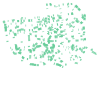

In [14]:
line = shapely.geometry.MultiLineString([shapely.wkt.loads(x) for x in gdf.the_geom])
line

In [18]:
# print(line)

### Add lines to the `geometry` column and print the result 

In [25]:
gdf['geometry'] = gdf.the_geom.apply(lambda x: shapely.wkt.loads(x) if x else GeometryCollection())
gdf.crs = {'init' : 'epsg:4326'}

E:\Anaconda3\envs\ML_new\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

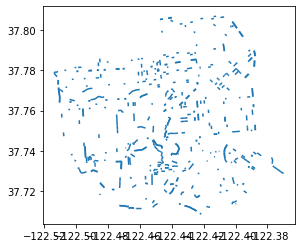

In [26]:
gdf.plot()

In [27]:
gdf.head()

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39032 37.78813, -122.39118 37..."
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37..."
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37..."
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37..."
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37..."
